1. By Users, data consists of:
  1. Artist, Album, Track, Timestamp

Simplest, just Users and Artists

## Notes

1. Some artists very popular, probably **don't** to display the really popular ones
2. Filter by (continuous) date, and time of day and year (spherical)

## Plots

1. By user, pairwise links between users given dirichlet over tracks played per artist
2. By artist, as above but over users
3. 


In [76]:
%matplotlib inline

In [89]:
import os
import re

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import seaborn as sns

In [96]:
imp = pd.read_csv("/Users/smason/Downloads/olorton.csv", header=False,
                  names=["artist","album","track","timestamp"])
imp["unit"] = 1
imp.groupby("artist")[["unit"]].count().reset_index().groupby("unit").count()

OSError: File b'/Users/smason/Downloads/olorton.csv' does not exist

In [114]:
imp = []
for f in os.listdir("data"):
    path = "data/%s" % f
    tmp = pd.read_csv(path, header=False,
                  names=["artist","album","track","timestamp"])
    tmp.timestamp = pd.to_datetime(tmp.timestamp)
    tmp["user"] = re.sub(r'\.csv','',f)
    imp.append(tmp)
imp = pd.concat(imp)

In [51]:
user_artists = imp.groupby(["user","artist"])[["timestamp"]].count().unstack(0)
user_artists[user_artists.isnull()] = 0

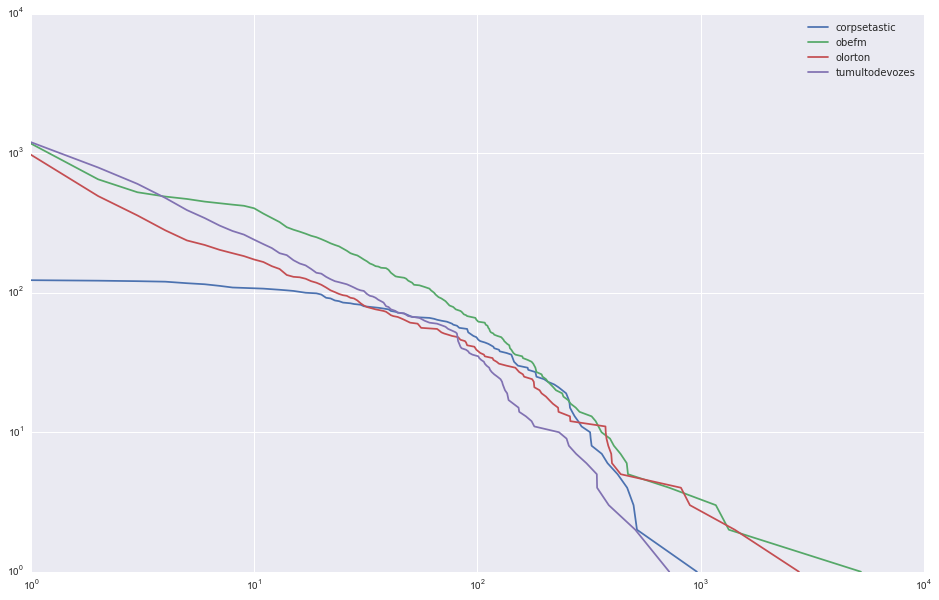

In [95]:
plt.figure(figsize=(16,10))
for f in np.unique(imp.user):
    im = imp[imp.user == f].groupby("artist")[["timestamp"]].count().reset_index().groupby("timestamp").count()
    plt.loglog(im.index, np.cumsum(im.artist[::-1])[::-1], label=f)
plt.legend();

In [105]:
imp["unit"] = 1
ip = pd.pivot_table(imp, values=["unit"],index=["artist"],columns="user", aggfunc="count").fillna(0)

In [116]:
np.sqrt(ip+0.5).corr()

unit                                   
user                corpsetastic     obefm   olorton tumultodevozes
     user                                                          
unit corpsetastic       1.000000  0.056223  0.212750       0.146800
     obefm              0.056223  1.000000  0.068947       0.094989
     olorton            0.212750  0.068947  1.000000       0.057684
     tumultodevozes     0.146800  0.094989  0.057684       1.000000